# **DATA 608 - Story 1**  
Euclides Nelson Rodriguez  
September 10, 2023
### **Infrastructure Investment & Jobs Act Funding Allocation**  
In this story we will address the following two questions:

> Is the allocation equitable based on the population of each of the States and Territories, or is bias apparent?

> Does the allocation favor the political interests of the Biden administration?






### **Data Sources**

US Population: https://data.ers.usda.gov/reports.aspx?ID=17827  
Tribal Community Population: https://www.osbm.nc.gov/blog/2021/11/10/native-american-population-sees-notable-increase-2020-census  
US Territory Poplulation: https://en.wikipedia.org/wiki/Territories_of_the_United_States  
2020 Presidential Elections: https://www.cookpolitical.com/2020-national-popular-vote-tracker



### **Libraries**

In [45]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#### **Preparing Data**
We obtain data from three sources. The first is from the IIJA Funding, the second from the USDA for US Territory Population, and the last is from wikipedia for the tribal population.  All population data is from the year 2020.   

In [41]:


df_money = pd.read_csv("https://raw.githubusercontent.com/engine2031/Data-Sets/main/IIJA%20FUNDING%20AS%20OF%20MARCH%202023.csv", sep = ',')

#Change column names to remove spaces
df_money = df_money.rename(columns={'State, Teritory or Tribal Nation': 'State_Territory'})


df_money = df_money.rename(columns={'Total (Billions)': 'Money_Dollars'})

#Convert Money column from billions to dollars
df_money['Money_Dollars'] = df_money['Money_Dollars']*1000000000

df_money.head()



,State_Territory,Money_Dollars
0,ALABAMA,3.000000e+09
1,ALASKA,3.700000e+09
2,AMERICAN SAMOA,6.860000e+07
3,ARIZONA,3.500000e+09
4,ARKANSAS,2.800000e+09


In [31]:
df_pop = pd.read_csv("https://raw.githubusercontent.com/engine2031/Data-Sets/main/USPop_2020_r2.csv")

# Make all cells in 'State' column uppercase
df_pop['State'] = df_pop['State'].str.upper()

df_pop.head()

,State,Population
0,ALABAMA,5024356
1,ALASKA,733378
2,ARIZONA,7151507
3,ARKANSAS,3011555
4,CALIFORNIA,39538245


In [32]:
df_terr = pd.read_csv("https://raw.githubusercontent.com/engine2031/Data-Sets/main/TerrPop_2020.csv")
df_terr.head()

,Territory,Population
0,AMERICAN SAMOA,49710
1,GUAM,153836
2,NORTHERN MARIANA ISLANDS,47329
3,PUERTO RICO,3285874
4,US VIRGIN ISLANDS,87146


Merging State and US Territory population data into one data set.  

In [33]:
# Merging Population Data
# Iterate through each row in DataFrame 'population'
for index_money, row_money in df_money.iterrows():
    x1_value = row_money['State_Territory']

    # Iterate through each row in DataFrame 'population'
    for index_pop, row_pop in df_pop.iterrows():
        x2_value = row_pop['State']
        y2_value = row_pop['Population']

        # Check if x1_value equals x2_value
        if x1_value == x2_value:
            # Merge y2_value into DataFrame 'money'
            df_money.at[index_money, 'Population'] = y2_value

df_money.head()

,State_Territory,Money_Dollars,Population
0,ALABAMA,3.000000e+09,5024356.0
1,ALASKA,3.700000e+09,733378.0
2,AMERICAN SAMOA,6.860000e+07,NaN
3,ARIZONA,3.500000e+09,7151507.0
4,ARKANSAS,2.800000e+09,3011555.0


In [34]:
# Merging US Territory Population Data
# Iterate through each row in DataFrame 'money'
for index_money, row_money in df_money.iterrows():
    x1_value = row_money['State_Territory']

    # Iterate through each row in DataFrame 'territory'
    for index_terr, row_terr in df_terr.iterrows():
        x2_value = row_terr['Territory']
        y2_value = row_terr['Population']

        # Check if x1_value equals x2_value
        if x1_value == x2_value:
            # Merge y2_value into DataFrame 'money'
            df_money.at[index_money, 'Population'] = y2_value

#Remove Decimal from Population Data
df_money = df_money.fillna(0)

df_money['Population'] = df_money['Population'].round().astype(int)

df_money.head()

,State_Territory,Money_Dollars,Population
0,ALABAMA,3.000000e+09,5024356
1,ALASKA,3.700000e+09,733378
2,AMERICAN SAMOA,6.860000e+07,49710
3,ARIZONA,3.500000e+09,7151507
4,ARKANSAS,2.800000e+09,3011555


Manually inserting single value of Tribal Communities Populations  

In [35]:
# Find the index where 'State_Territory' equals TRIBAL COMMUNITIES
row_index = df_money.index[df_money['State_Territory'] == 'TRIBAL COMMUNITIES'].tolist()[0]

# Replace 'New Value' with the value you want to insert
df_money.at[row_index, 'Population'] = 9700000


### **Data Visualization - Bias in Population**


In [40]:
# Add dollar per capita per stat to prepare the visualization.
#type(df_money['Population'][0]) - Test line
df_money['Dollar Per Capita'] = df_money['Money_Dollars'] / df_money['Population']
df_total = df_money.iloc[:, [0, 1, 2,3]]
df_total.head()

,State_Territory,Money_Dollars,Population,Dollar Per Capita
0,ALABAMA,3.000000e+09,5024356,597.091448
1,ALASKA,3.700000e+09,733378,5045.147250
2,AMERICAN SAMOA,6.860000e+07,49710,1380.004023
3,ARIZONA,3.500000e+09,7151507,489.407338
4,ARKANSAS,2.800000e+09,3011555,929.752238


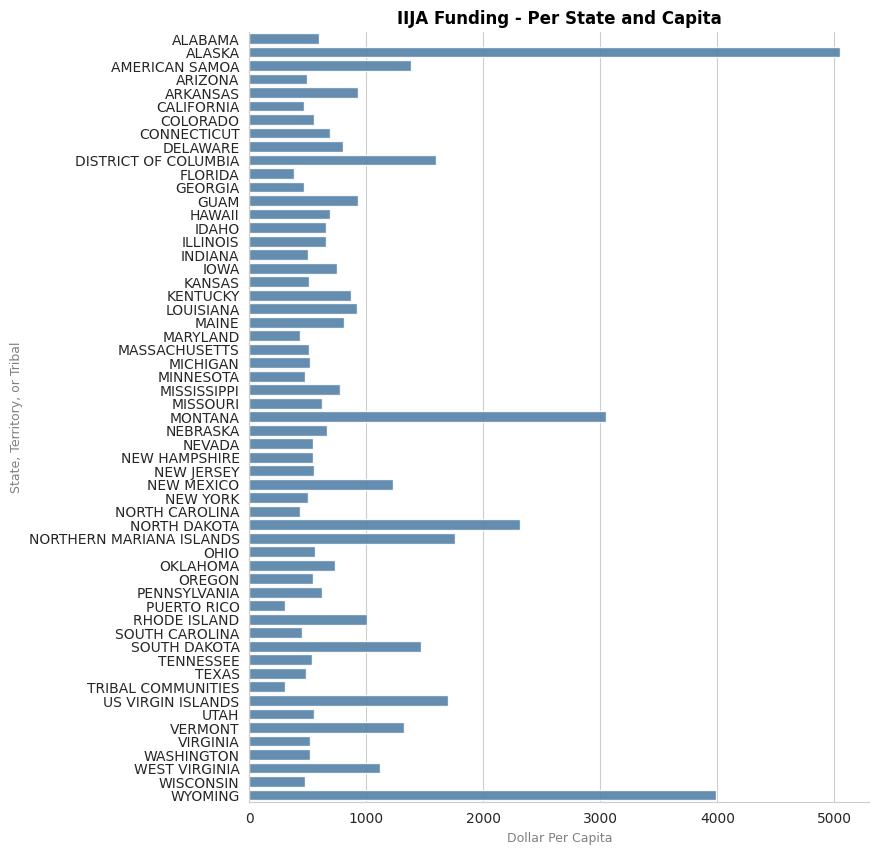

In [159]:
fig, ax = plt.subplots(figsize=(8, 10))

# Create a bar plot
b=sns.barplot(x='Dollar Per Capita', y='State_Territory', data=df_total, orient='h', color='steelblue', alpha=0.9)
sns.despine()
# Set plot labels and title
b.set_xlabel('Dollar Per Capita', fontsize=9)
b.xaxis.label.set_color('grey')
b.set_ylabel('State, Territory, or Tribal', fontsize=9)
b.yaxis.label.set_color('grey')
b.axes.set_title('IIJA Funding - Per State and Capita', fontsize=12, color='black', weight='bold')

plt.show()

In [128]:
df_pres = pd.read_csv("https://raw.githubusercontent.com/engine2031/Data-Sets/main/US2020_Pres_State.csv", sep = ',')

#Made all state upper case so that we can merge with dataframe
df_pres['state'] = df_pres['state'].str.upper()

#Change notation for party called
df_pres['called'] = df_pres['called'].str.replace('D', 'Democrat')
df_pres['called'] = df_pres['called'].str.replace('R', 'Republican')


df_pres.head()

,state,called
0,ARIZONA,Democrat
1,FLORIDA,Republican
2,GEORGIA,Democrat
3,IOWA,Republican
4,MICHIGAN,Democrat


In [145]:
# Merging 2020 election result by state and party called for

# Iterate through each row in DataFrame 'Total'
for index_total, row_total in df_total.iterrows():
    x1_value = row_total['State_Territory']

    # Iterate through each row in DataFrame 'Pres'
    for index_pres, row_pres in df_pres.iterrows():
        x2_value = row_pres['state']
        y2_value = row_pres['called']

        # Check if x1_value equals x2_value
        if x1_value == x2_value:
            # Merge y2_value into DataFrame 'Total'
            df_total.at[index_total, '2020 Election'] = y2_value

#Remove Decimal from Population Data
#df_money = df_money.fillna(0)

#df_money['Population'] = df_money['Population'].round().astype(int)

df_total.head()

,State_Territory,Money_Dollars,Population,Dollar Per Capita,2020_Pres,2020 Presidential Election,2020 Party,Party,2020 Election
0,ALABAMA,3.000000e+09,5024356,597.091448,Republican,Republican,Republican,Republican,Republican
1,ALASKA,3.700000e+09,733378,5045.147250,Republican,Republican,Republican,Republican,Republican
2,AMERICAN SAMOA,6.860000e+07,49710,1380.004023,NaN,NaN,NaN,NaN,NaN
3,ARIZONA,3.500000e+09,7151507,489.407338,Democrat,Democrat,Democrat,Democrat,Democrat
4,ARKANSAS,2.800000e+09,3011555,929.752238,Republican,Republican,Republican,Republican,Republican


(350.0, 1500.0)

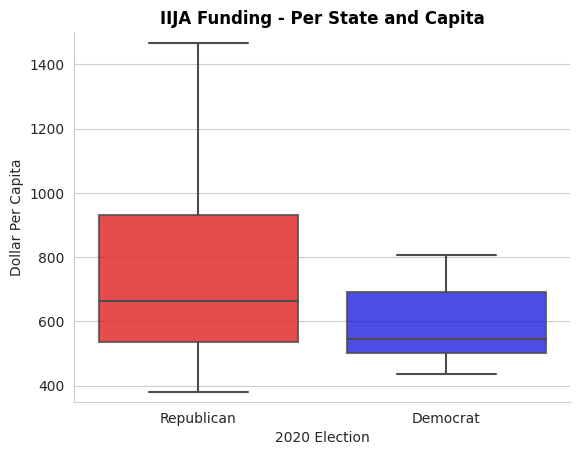

In [163]:
# Create boxplot to compare IIJA funding spent based on 2020 election
sns.set_style("whitegrid")
my_colors = ['red', 'blue']
sns.set_palette(my_colors)

#Boxplot with transparency changed
b= sns.boxplot(data=df_total, x="2020 Election", y="Dollar Per Capita", fliersize=0, boxprops=dict(alpha=0.8))
b.axes.set_title('IIJA Funding - Per State and Capita', fontsize=12, color='black', weight='bold')
sns.despine()
plt.ylim(350,1500)